In [26]:
import numpy as np

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    ## default is to not include zero counts in the top three, set zero_counts = True in function call to include zero counts
    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        spatial = counts.largest_non_zero

        if non_zero_distinct_rows == 1:
            # print(f"pseudo mixing time has been found at time {times[t]}")
            times_index = t + 1
            pmixing = times[t]

            for tnew in range(times_index, n):
                if np.random.random() < N/(N + b*M):
                    i = np.random.randint(N)
                    if X[i] != 0:
                        counts.increment(X[i], -1)
                        X[i] = 0
                        counts.increment(0, 1)
                else:
                    i,j = E[np.random.randint(M)]
                    if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                        new = X[i] | X[j]
                        counts.increment(X[i], -1)
                        counts.increment(X[j], -1)
                        counts.increment(new, 2)
                        X[i] = X[j] = new
                R[tnew] = non_zero_distinct_rows = len(counts) - (0 in counts)
                spatial = counts.largest_non_zero

                if (non_zero_distinct_rows == 0) or (times[tnew] > 4 * pmixing):
                    # print(f"The simulation is exiting because extinction time has been reached or the simulation has run for 4 times the pseudo mixing time. The simulation has run for {tnew} steps.")
                    times = times[:tnew]
                    R = R[:tnew]
                    break
            break

    return times, R, spatial, pmixing

In [17]:
N =  2000
M = 3*N
## very large Tmax, this will not be our time out condition anymore
Tmax = 1e3

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

Test that the new version of the simulation works -- it does! :)

In [19]:
b = 1.67
times, R, spatial, pmixing, counts = find_tranformation_matrix(b, E, N, Tmax)

print(f"The pseudo mixing time is {pmixing}")
print(f"S1* is {spatial}")
print(len(times))
print(len(R))
print(times[-1])

pseudo mixing time has been found at time 5.606353270648179
The simulatio is exiting because extinction time has been reached or the simulation has run for 4 times the pseudo mixing time. The simulation has run for 269753 steps.
The pseudo mixing time is 5.606353270648179
S1* is 1806
269753
269753
22.425362382766046


In [23]:
N =  2000
M = 3*N
Tmax = 1e3

## try changing Tmax = 200


## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

In [29]:
b = np.linspace(0.002, 0.5, 20)
s1starvar = []
s1starav = []
pmixinglist = []
for i in range(len(b)):
    s1 = []
    pm = []
    for j in range(1000):
        times, R, spatial, pmixing = find_tranformation_matrix(b[i], E, N, Tmax)
        s1.append(spatial)
        pm.append(pmixing)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    pmixinglist.append(np.mean(pm))
    print('b completed: ', b[i], 'average: ', s1starav[i], 'variance: ', s1starvar[i], 'pmixing: ', pmixinglist[i])
print(s1starav)
print(s1starvar)
print(pmixinglist)

b completed:  0.002 average:  2.156 variance:  0.13966399999999998 pmixing:  7.249555475788123
b completed:  0.02821052631578947 average:  4.391 variance:  0.546119 pmixing:  8.211314009916297
b completed:  0.054421052631578946 average:  6.299 variance:  1.357599 pmixing:  9.56422173986553
b completed:  0.08063157894736842 average:  8.616 variance:  3.050544 pmixing:  11.527828629771204
b completed:  0.10684210526315789 average:  12.137 variance:  6.996231 pmixing:  14.84341428538484
b completed:  0.13305263157894737 average:  18.61 variance:  24.8079 pmixing:  21.05118674170324
b completed:  0.15926315789473683 average:  40.799 variance:  257.72659899999996 pmixing:  40.41089423361981
b completed:  0.18547368421052632 average:  290.388 variance:  447.963456 pmixing:  92.47773573037202
b completed:  0.21168421052631578 average:  484.093 variance:  313.70435100000003 pmixing:  58.403432379021325
b completed:  0.23789473684210524 average:  637.047 variance:  267.7687910000001 pmixing:  4

Took 923 minutes

In [30]:
s1starav = [2.156, 4.391, 6.299, 8.616, 12.137, 18.61, 40.799, 290.388, 484.093, 637.047, 761.994, 866.419, 955.24, 1031.316, 1096.494, 1153.705, 1204.342, 1249.299, 1290.395, 1327.631]
s1starvar = [0.13966399999999998, 0.546119, 1.357599, 3.050544, 6.996231, 24.8079, 257.72659899999996, 447.963456, 313.70435100000003, 267.7687910000001, 235.139964, 214.123439, 197.84640000000002, 183.46614399999996, 172.97796400000001, 151.209975, 145.015036, 136.173599, 138.56697499999999, 124.28083899999997]
pmixinglist = [7.249555475788123, 8.211314009916297, 9.56422173986553, 11.527828629771204, 14.84341428538484, 21.05118674170324, 40.41089423361981, 92.47773573037202, 58.403432379021325, 42.585251201812866, 34.26245546263048, 28.885767701697638, 25.062511307283465, 22.10306542604874, 19.918921427903594, 18.109976535997294, 16.72294215637463, 15.47766548808797, 14.564422371631194, 13.691608803982378]

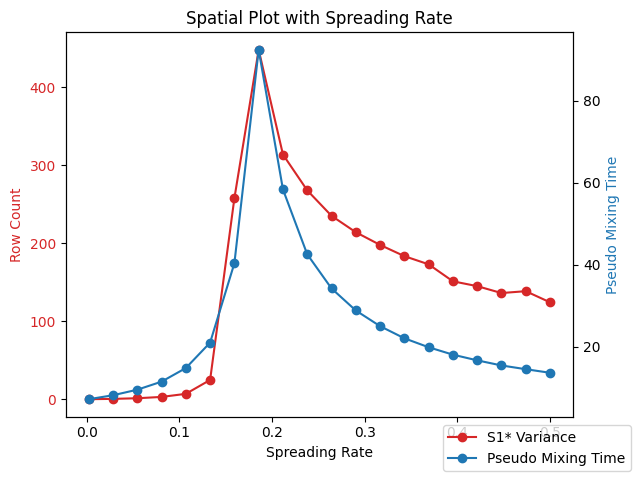

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Row Count', color=color)
ax1.plot(b, s1starvar, color=color, marker = 'o', label= 'S1* Variance')
# color = 'tab:pink'
# ax1.plot(b, s1std, color=color, marker = 'o', label= 'S1* Standard Deviation')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(b, pmixinglist, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax2.set_ylabel('Pseudo Mixing Time', color=color)


fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
